# primitives

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3D

In [13]:
MAX = 10
GRID = 51

CONE_RADIUS = 1
CONE_HEIGHT = 2
SPHERE_RADIUS = 1
CYLINDER_RADIUS = 1
CYLINDER_HEIGHT = 1
RECT_LENGTH = 1
RECT_WIDTH = 2
RECT_HEIGHT = 3

## 球

In [14]:
def render_sphere(radius=SPHERE_RADIUS):
    """render sphere on notebook

    Args:
        radius (int): radius of sphere

    Return:
        None
    """

    if radius < 0 or MAX < radius:
        print(f"set radius between 0 and {MAX}")
        return

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    theta = np.linspace(0, 2 * np.pi, GRID)
    phi = np.linspace(0, np.pi, GRID)
    t, p = np.meshgrid(theta, phi)

    X = radius * np.sin(p) * np.cos(t)
    Y = radius * np.sin(p) * np.sin(t)
    Z = radius * np.cos(p)

    ax.set_xlabel("x axis")
    ax.set_ylabel("y axis")
    ax.set_zlabel("z axis")
    ax.set_xlim(-1 * MAX, MAX)
    ax.set_ylim(-1 * MAX, MAX)
    ax.set_zlim(-1 * MAX, MAX)

    ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)
    plt.show()

<IPython.core.display.Javascript object>


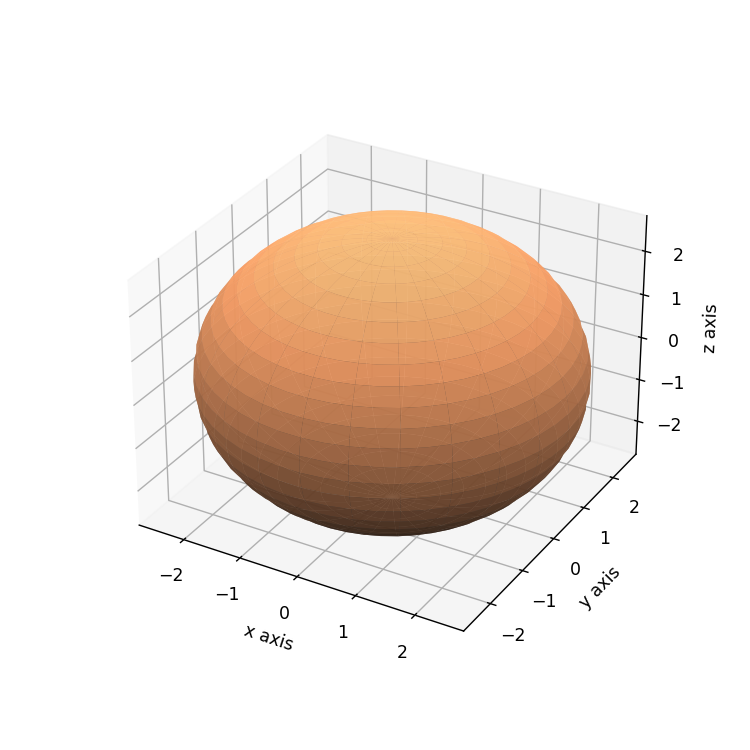

In [25]:
render_sphere(radius=3)

## 円錐

In [16]:
def render_cone(radius=CONE_RADIUS, height=CONE_HEIGHT):
    """render cone on notebook

    Args:
        radius (int): radius of bottom circle
        height (int): height of cone

    Returns:
        None
    """

    if radius < 0 or MAX < radius:
        print(f"set radius between 0 and {MAX}")
        return
    if height < 0 or MAX < height:
        print(f"set height between 0 and {MAX}")
        return

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    theta = np.linspace(0, 2 * np.pi, GRID)
    r = np.linspace(0, radius, GRID)
    t, R = np.meshgrid(theta, r)

    X = R * np.cos(t)
    Y = R * np.sin(t)
    Z = -1 * R * (height / radius) + height

    ax.set_xlabel("x axis")
    ax.set_ylabel("y axis")
    ax.set_zlabel("z axis")
    ax.set_xlim(-1 * MAX, MAX)
    ax.set_ylim(-1 * MAX, MAX)
    ax.set_zlim(0, 2 * MAX)

    ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)
    plt.show()

<IPython.core.display.Javascript object>


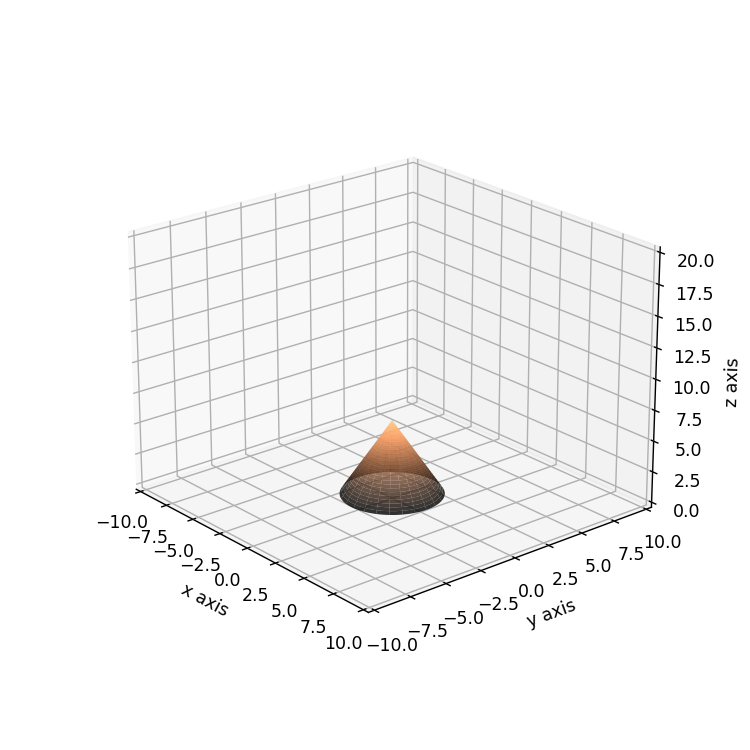

In [17]:
render_cone(radius=3, height=6)

## cylinder

In [19]:
def render_cylinder(radius=CYLINDER_RADIUS, height=CYLINDER_HEIGHT):
    """render cylinder on notebook

    Args:
        radius (int): radius of bottom circle
        height (int): height of cylinder

    Returns:
        None
    """

    if radius < 0 or MAX < radius:
        print(f"set radius between 0 and {MAX}")
        return
    if height < 0 or MAX < height:
        print(f"set height between 0 and {MAX}")
        return

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    theta = np.linspace(0, 2 * np.pi, GRID)
    r = np.linspace(0, radius, GRID)
    t, R = np.meshgrid(theta, r)

    # side
    X = radius * np.cos(t)
    Y = radius * np.sin(t)
    Z = height * R / radius

    ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)

    # top
    X = R * np.cos(t)
    Y = R * np.sin(t)
    Z = R * 0 + height

    ax.plot_surface(X, Y, Z, alpha=0.2, cmap=cm.copper)

    # bottom
    X = R * np.cos(t)
    Y = R * np.sin(t)
    Z = R * 0 + 0

    ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)

    ax.set_xlabel("x axis")
    ax.set_ylabel("y axis")
    ax.set_zlabel("z axis")
    ax.set_xlim(-1 * MAX, MAX)
    ax.set_ylim(-1 * MAX, MAX)
    ax.set_zlim(0, 2 * MAX)

    ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.copper)
    plt.show()

<IPython.core.display.Javascript object>


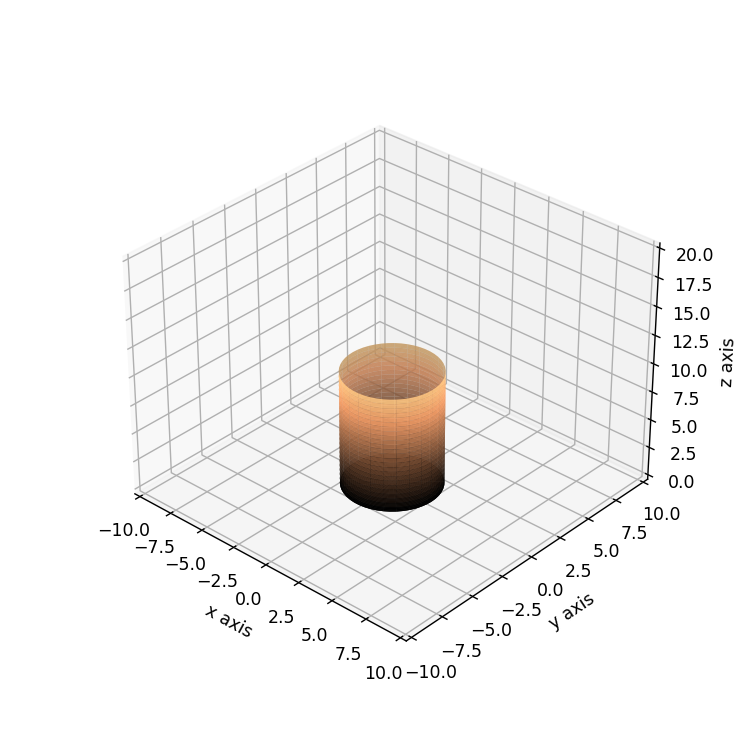

In [22]:
render_cylinder(radius=3, height=10)

## rectangular

In [23]:
def render_rectangular(length=RECT_LENGTH, width=RECT_WIDTH, height=RECT_HEIGHT):
    """render rectangular on notebook

    Args:
        length (int): length of rectangular
        width (int): width of rectangular
        height (int): height of rectangular
    Return:
        None
    """
    if length < 0 or MAX < length:
        print(f"set length between 0 and {MAX}")
        return
    if width < 0 or MAX < width:
        print(f"set widthbetween 0 and {MAX}")
        return
    if height < 0 or MAX < height:
        print(f"set height between 0 and {MAX}")
        return

    points = np.array([
        [0, 0, 0],
        [length, 0, 0],
        [length, width, 0],
        [0, width, 0],
        [0, 0, height],
        [length, 0, height],
        [length, width, height],
        [0, width, height],
    ])
    verts = [
        [points[0], points[1], points[2], points[3]],
        [points[4], points[5], points[6], points[7]],
        [points[0], points[1], points[5], points[4]],
        [points[2], points[3], points[7], points[6]],
        [points[1], points[2], points[6], points[5]],
        [points[4], points[7], points[3], points[0]],
    ]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    X, Y = np.meshgrid([0, length], [0, width])

    ax.scatter3D(points[:, 0], points[:, 1], points[:, 2])
    ax.add_collection3d(Poly3DCollection(verts, facecolors="cyan", linewidths=1, edgecolors="r", alpha=0.20))

    ax.set_xlabel("x axis")
    ax.set_ylabel("y axis")
    ax.set_zlabel("z axis")
    ax.set_xlim(0, MAX)
    ax.set_ylim(0, MAX)
    ax.set_zlim(0, MAX)

    plt.show()

<IPython.core.display.Javascript object>


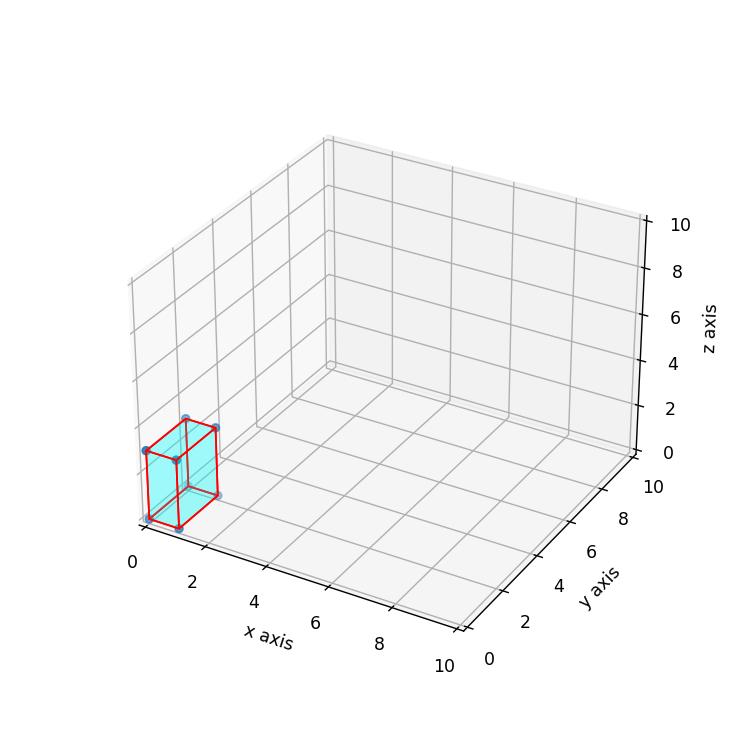

In [24]:
render_rectangular(length=1, width=2, height=3)